In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings ("ignore")

import plotly.express as px

# display settings
%matplotlib inline
sns.set_palette('muted')

In [11]:
df = pd.read_csv("athlete_events.csv")

In [13]:
df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

In [17]:
# No of Rows and Columns
df.shape

(271116, 15)

In [25]:
# Data Types
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [77]:
# Finding Null Values
df.isnull().sum()

ID                0
Name              0
Sex               0
Age               0
Height            0
Weight            0
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal        229370
Won_Medal         0
BMI               0
Decade            0
dtype: int64

In [29]:
# Duplicates
df.duplicated().sum()

1385

In [31]:
# Describe
df.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

#### Handling Missing Values

In [75]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df.groupby(['Sex', 'Sport'])['Height'].transform('median'), inplace=True)
df['Weight'].fillna(df.groupby(['Sex', 'Sport'])['Weight'].transform('median'), inplace=True)


In [81]:
# add 'No Medal' as a category then fill
df['Medal'] = df['Medal'].cat.add_categories('No Medal')
df['Medal'].fillna('No Medal', inplace=True)


ValueError: new categories must not include old categories: {'No Medal'}

#### Removing Duplicates

In [41]:
df.drop_duplicates(inplace=True)


#### Feature Engineering (Creating New Columns)

In [44]:
df['Won_Medal'] = df['Medal'].notnull().astype(int)


In [47]:
df['BMI'] = df['Weight'] / (df['Height']/100)**2


In [49]:
df['Decade'] = (df['Year'] // 10) * 10


#### Converting Data Types

In [52]:
df['Sex'] = df['Sex'].astype('category')
df['Season'] = df['Season'].astype('category')
df['Medal'] = df['Medal'].astype('category')


#### Handling Outliers

In [55]:
df = df[(df['Age'] >= 10) & (df['Age'] <= 60)]
df = df[(df['Height'] >= 130) & (df['Height'] <= 220)]
df = df[(df['Weight'] >= 30) & (df['Weight'] <= 200)]


#### Saving the File

In [58]:
df.to_csv("cleaned_olympics.csv", index=False)


## EDA

In [83]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0   178.0    73.0         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0   182.0    95.0  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  Won_Medal        BMI  Decade  
0       Basketball Men's Basketball  No Medal          0  24.691358    1990  
1      Judo Men's Extra-Lightweight  No Medal          0  20.761246    2010  
2           Football Men's Football  No Medal          0  23.040020    1920  
3       Tug-Of-War Men's Tug-Of-War      Gold          1  28.680111    1900  
4  Speed Skating Women's 500 metres  No Medal          0  23.959094    1980

#### Distribution And Summary to understand Age, Height, Weight, BMI distributions and outliers.

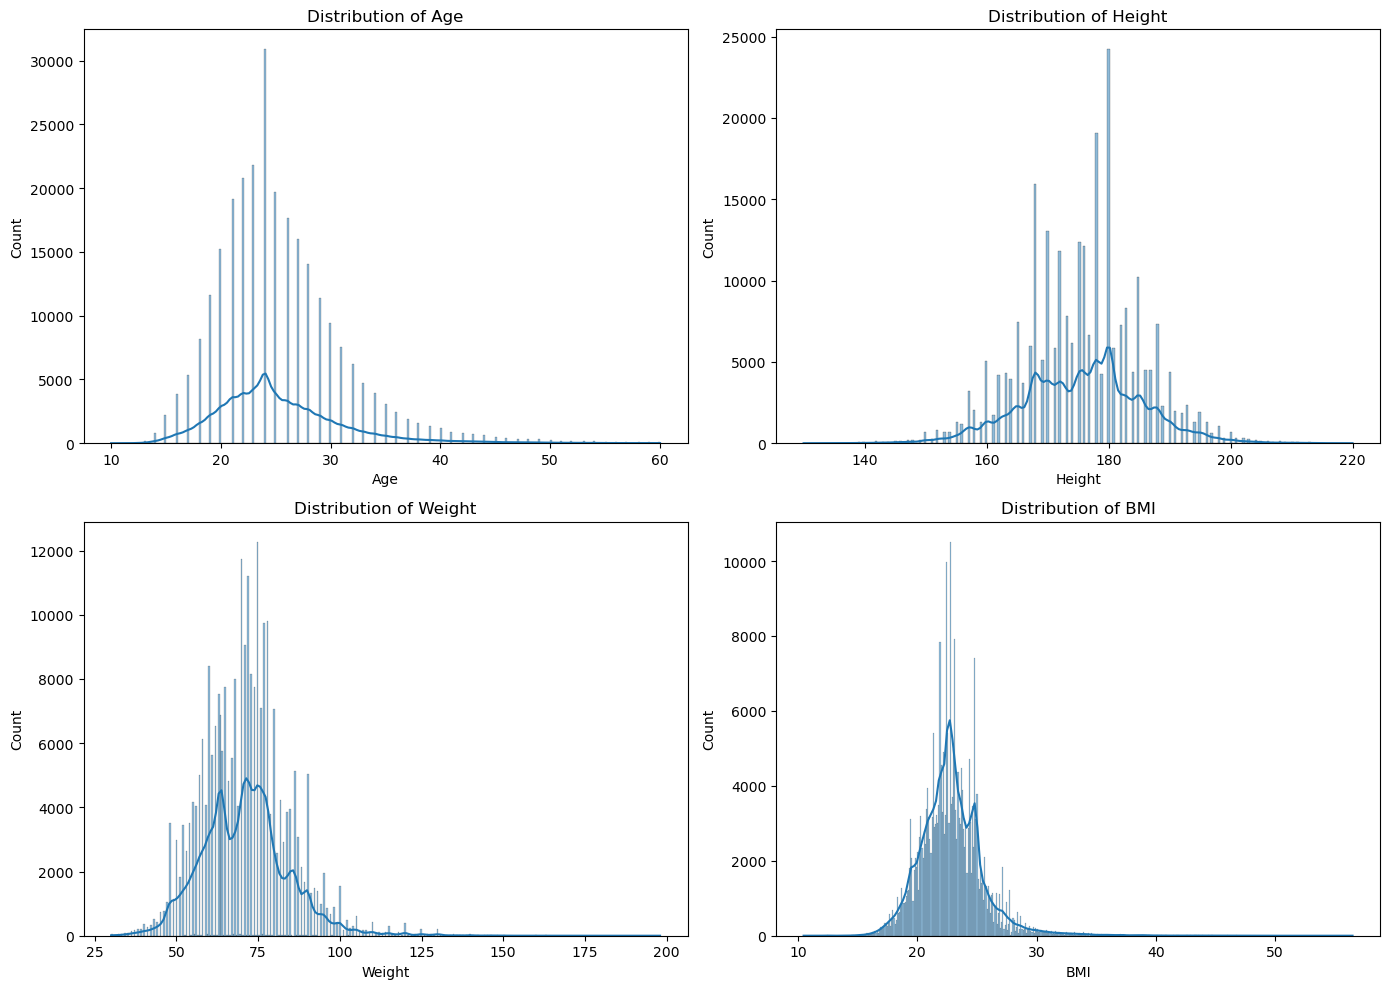

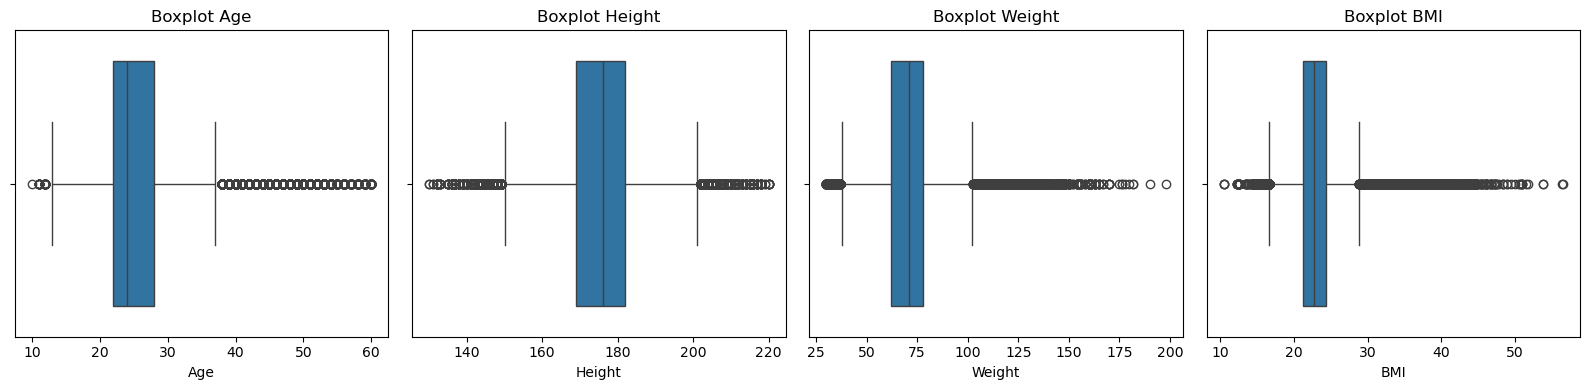

In [67]:
# Histograms + boxplots
num_cols = ['Age','Height','Weight','BMI']
fig, axes = plt.subplots(2,2, figsize=(14,10))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

# Boxplots to inspect outliers
fig, axes = plt.subplots(1,4, figsize=(16,4))
for ax, col in zip(axes, num_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot {col}')
plt.tight_layout()


#### Counts and Top Categories to see Top Sports, Countries, Seasons, Medals.

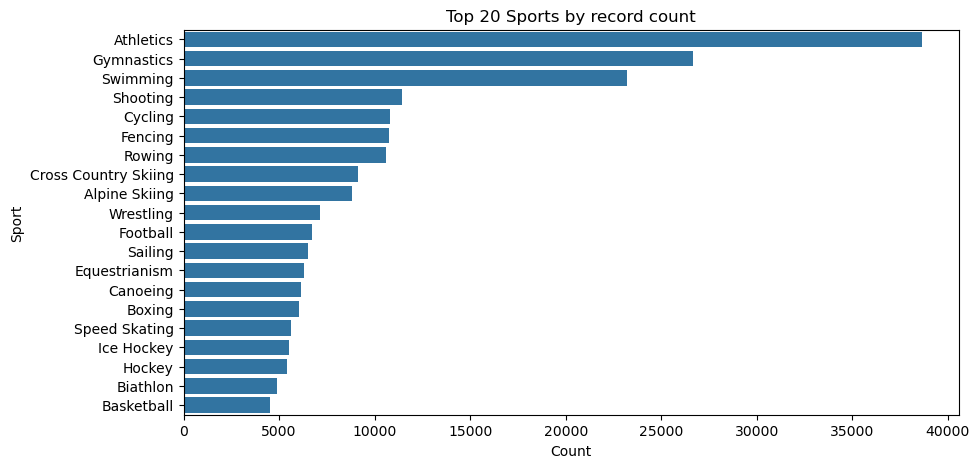

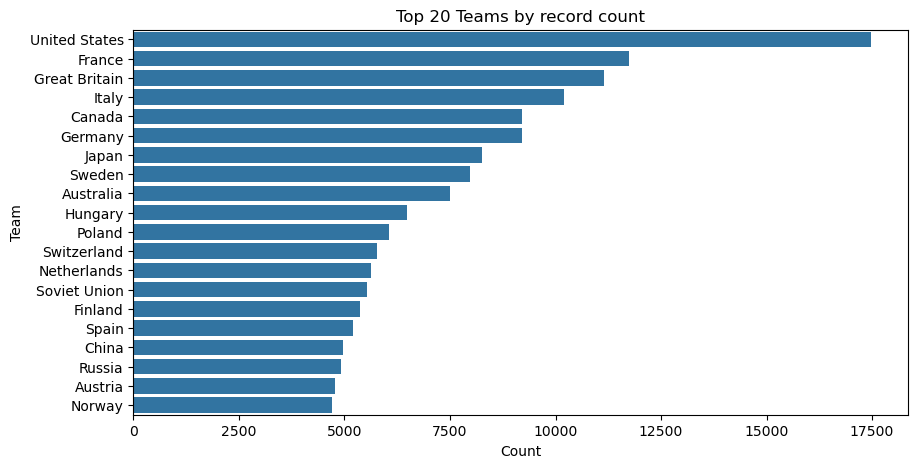

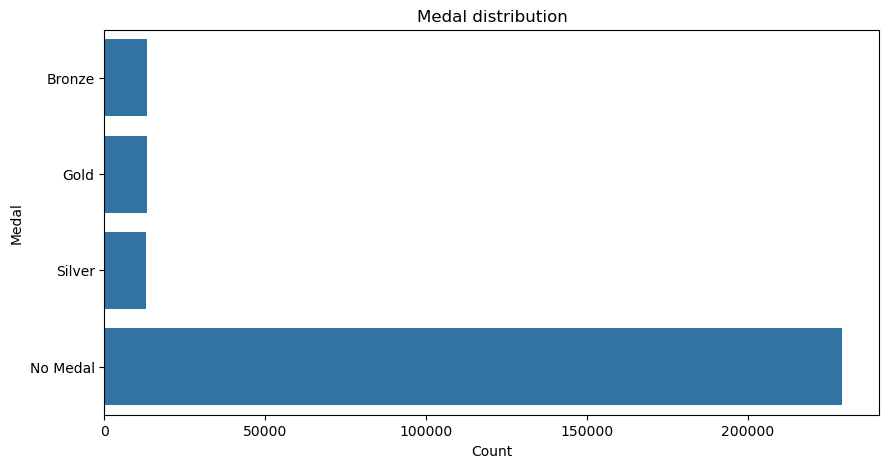

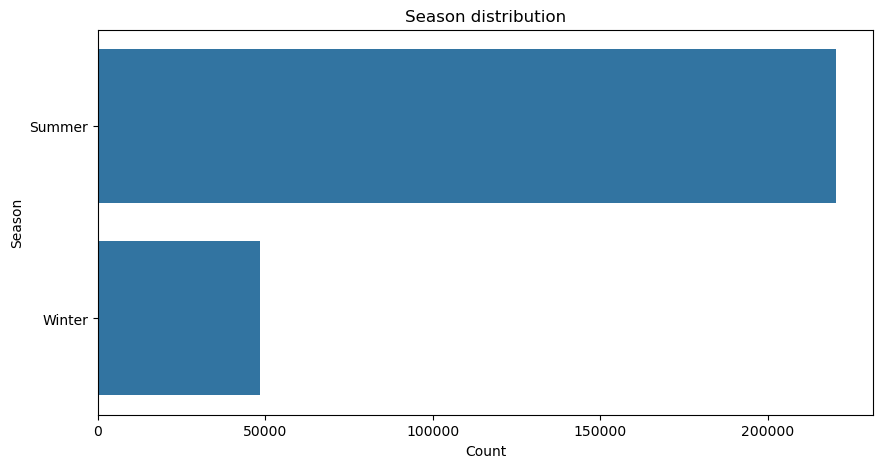

In [85]:
# Categorical counts - top 20
def plot_top(series, title, n=20):
    vc = series.value_counts().nlargest(n)
    plt.figure(figsize=(10,5))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(title)
    plt.xlabel('Count')
    plt.show()

plot_top(df['Sport'], 'Top 20 Sports by record count', 20)
plot_top(df['Team'], 'Top 20 Teams by record count', 20)
plot_top(df['Medal'].fillna('No Medal'), 'Medal distribution', 10)
plot_top(df['Season'], 'Season distribution', 10)


#### Medal counts by country - which countries win the most medals (all-time)

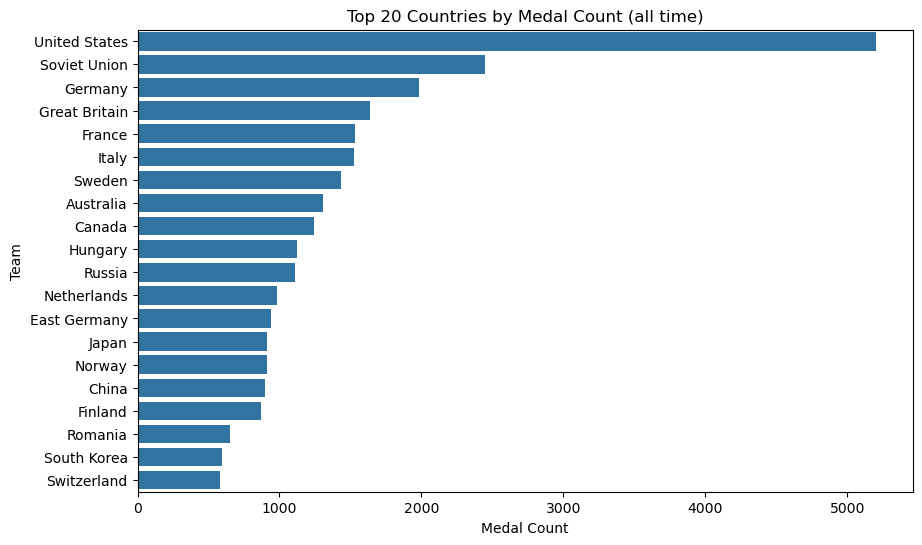

In [87]:
# Medal counts by country (only medal rows)
medals = df[df['Won_Medal']==1].copy()
medal_counts = medals.groupby('Team')['Won_Medal'].sum().sort_values(ascending=False)
top_medal_countries = medal_counts.head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_medal_countries.values, y=top_medal_countries.index)
plt.title('Top 20 Countries by Medal Count (all time)')
plt.xlabel('Medal Count')
plt.show()


#### Medals over time — global trend and top countries - 

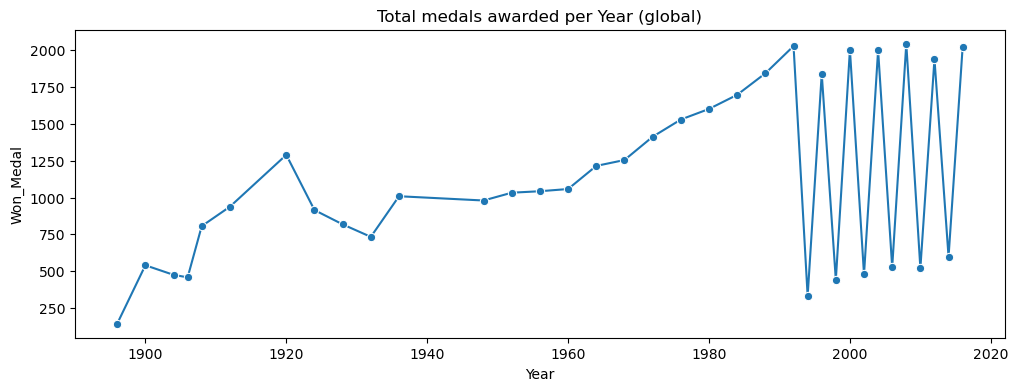

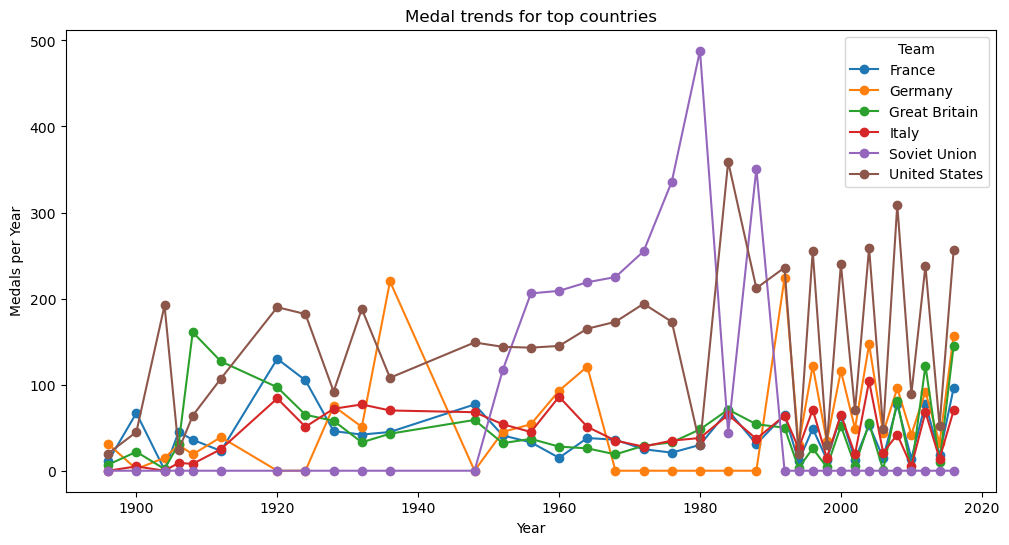

In [89]:
# 5a. Global medals per year
medals_per_year = medals.groupby('Year')['Won_Medal'].sum().reset_index()
plt.figure(figsize=(12,4))
sns.lineplot(data=medals_per_year, x='Year', y='Won_Medal', marker='o')
plt.title('Total medals awarded per Year (global)')
plt.show()

# 5b. Trend for top 6 countries
top_countries = medal_counts.head(6).index.tolist()
df_top = medals[medals['Team'].isin(top_countries)]
pivot = df_top.pivot_table(index='Year', columns='Team', values='Won_Medal', aggfunc='sum').fillna(0)
pivot.plot(figsize=(12,6), marker='o')
plt.title('Medal trends for top countries')
plt.ylabel('Medals per Year')
plt.show()


#### Medal efficiency — medals per athlete sent (country level Team)

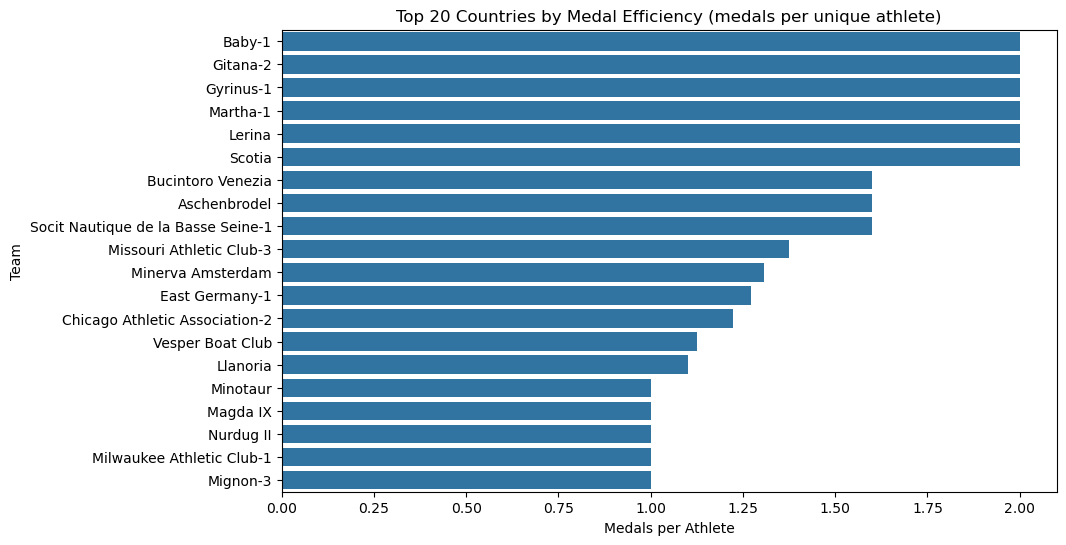

In [91]:
# 6. Medal efficiency per country (all-time)
athletes_per_country = df.groupby('Team')['ID'].nunique()
medals_per_country = medals.groupby('Team')['Won_Medal'].sum()
eff = (medals_per_country / athletes_per_country).dropna().sort_values(ascending=False)
top_eff = eff.head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_eff.values, y=top_eff.index)
plt.title('Top 20 Countries by Medal Efficiency (medals per unique athlete)')
plt.xlabel('Medals per Athlete')
plt.show()


#### Age / Height / Weight vs Medal — boxplots & stats

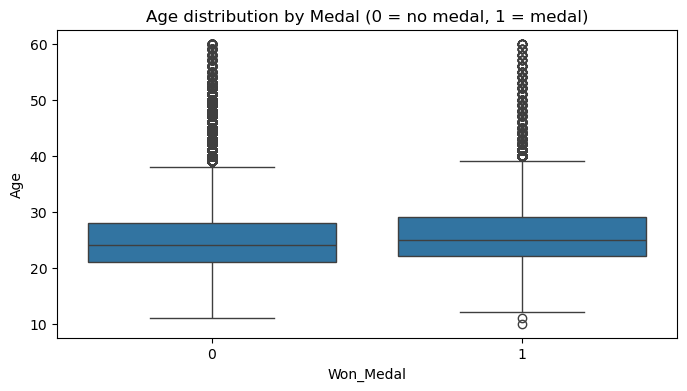

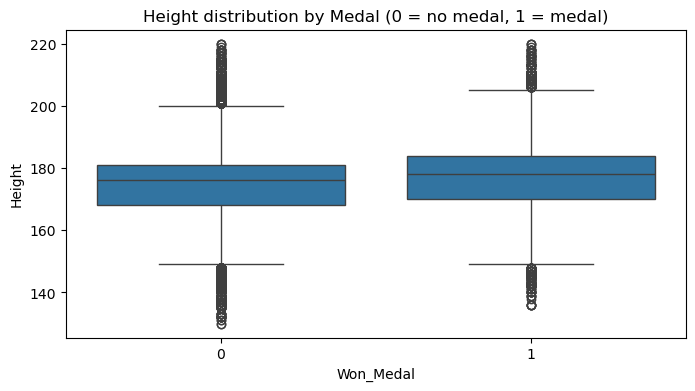

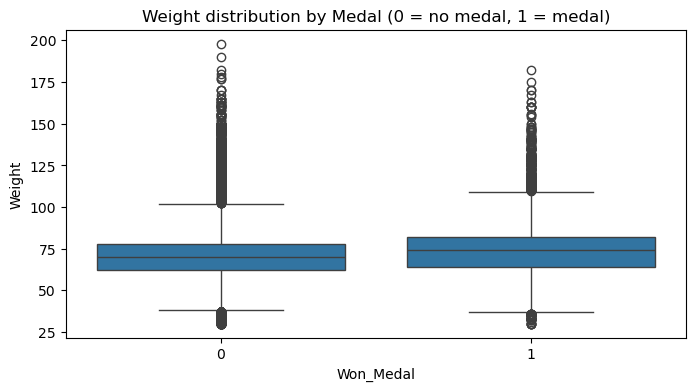

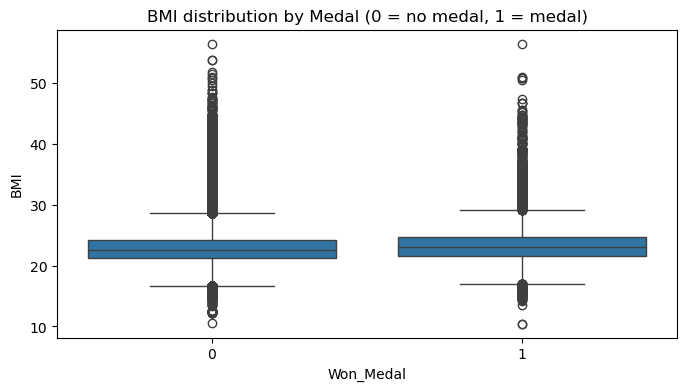

Age  Height  Weight        BMI
Won_Medal                                 
0          24.0   176.0    70.0  22.634676
1          25.0   178.0    74.0  23.040020

In [93]:
# 7. Compare distributions by Won_Medal
for col in ['Age','Height','Weight','BMI']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Won_Medal', y=col, data=df)
    plt.title(f'{col} distribution by Medal (0 = no medal, 1 = medal)')
    plt.show()

# simple group stats
df.groupby('Won_Medal')[['Age','Height','Weight','BMI']].median()


#### Sport-specific analysis — limit to top sports

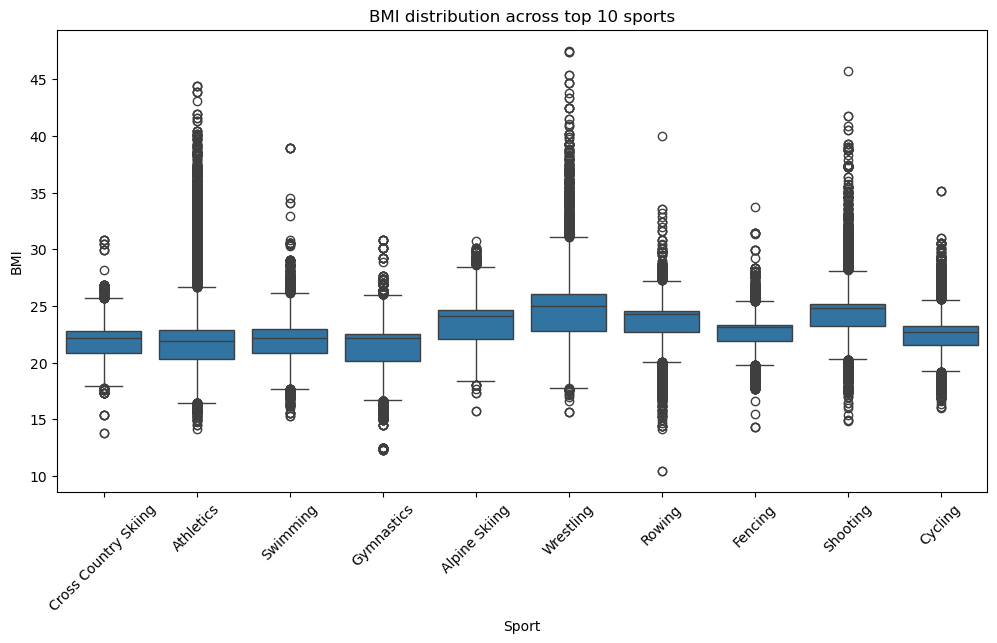

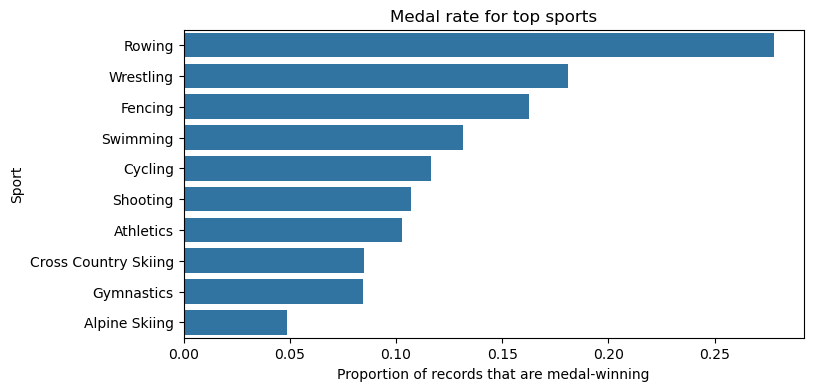

In [95]:
# 8. Sport-specific: pick top 10 sports by records and plot BMI distributions
top_sports = df['Sport'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Sport', y='BMI', data=df[df['Sport'].isin(top_sports)])
plt.xticks(rotation=45)
plt.title('BMI distribution across top 10 sports')
plt.show()

# Also show medal rates by sport
sport_medal_rate = df.groupby('Sport')['Won_Medal'].mean().loc[top_sports].sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=sport_medal_rate.values, y=sport_medal_rate.index)
plt.xlabel('Proportion of records that are medal-winning')
plt.title('Medal rate for top sports')
plt.show()


#### Height vs Weight scatter, colored by Sport or Medal

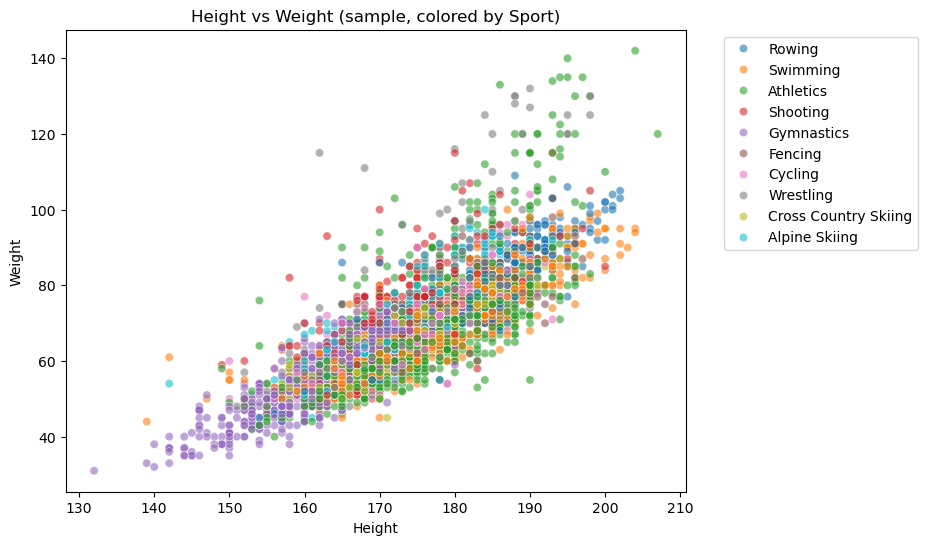

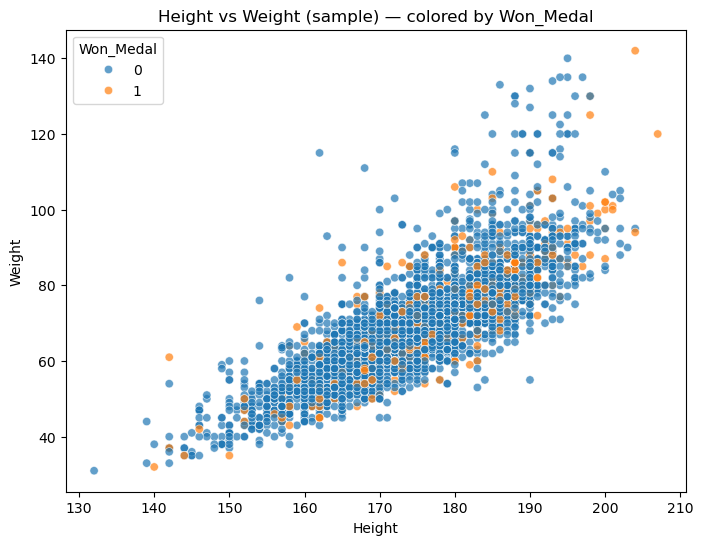

In [97]:
# 9. Scatter: Height vs Weight for a sample (to avoid huge plot)
sample = df[df['Sport'].isin(top_sports)].sample(5000, random_state=42)
plt.figure(figsize=(8,6))
sns.scatterplot(data=sample, x='Height', y='Weight', hue='Sport', alpha=0.6)
plt.title('Height vs Weight (sample, colored by Sport)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# Color by won medal
plt.figure(figsize=(8,6))
sns.scatterplot(data=sample, x='Height', y='Weight', hue='Won_Medal', alpha=0.7)
plt.title('Height vs Weight (sample) — colored by Won_Medal')
plt.show()


#### Correlation heatmap to see numeric relationships, e.g., Height vs Weight vs Age vs BMI.

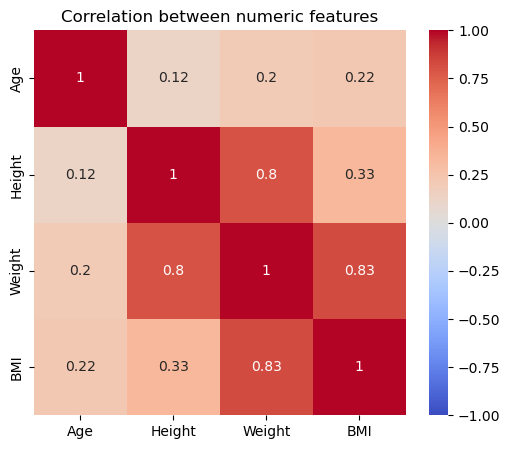

In [99]:
# 10. Correlation heatmap
num = df[['Age','Height','Weight','BMI']].dropna()
corr = num.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between numeric features')
plt.show()


#### Top athletes by medals

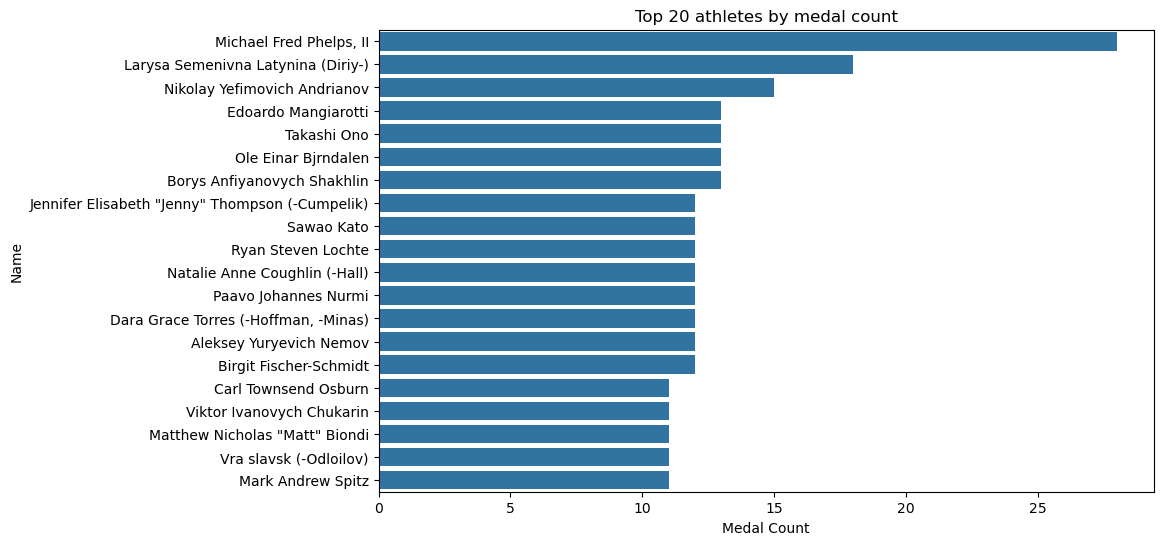

ID                     Name Sex   Age  Height  Weight  \
169657  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169658  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169659  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169660  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169661  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169662  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169663  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169664  85286  Aleksey Yuryevich Nemov   M  20.0   174.0    75.0   
169665  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169666  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169667  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169668  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169669  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169670  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169671  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169672  85286  Aleksey Yuryevich Nemov   M  24.0   174.0    75.0   
169673  85286  Aleksey Yuryevich Nemov   M  28.0   174.0    75.0   
169674  85286  Aleksey Yuryevich Nemov   M  28.0   174.0    75.0   
169675  85286  Aleksey Yuryevich Nemov   M  28.0   174.0    75.0   
169676  85286  Aleksey Yuryevich Nemov   M  28.0   174.0    75.0   
169677  85286  Aleksey Yuryevich Nemov   M  28.0   174.0    75.0   
69801   35550   Birgit Fischer-Schmidt   F  18.0   172.0    69.0   
69802   35550   Birgit Fischer-Schmidt   F  26.0   172.0    69.0   
69803   35550   Birgit Fischer-Schmidt   F  26.0   172.0    69.0   
69804   35550   Birgit Fischer-Schmidt   F  26.0   172.0    69.0   
69805   35550   Birgit Fischer-Schmidt   F  30.0   172.0    69.0   
69806   35550   Birgit Fischer-Schmidt   F  30.0   172.0    69.0   
69807   35550   Birgit Fischer-Schmidt   F  34.0   172.0    69.0   
69808   35550   Birgit Fischer-Schmidt   F  34.0   172.0    69.0   
69809   35550   Birgit Fischer-Schmidt   F  34.0   172.0    69.0   

                Team  NOC        Games  Year  Season       City       Sport  \
169657        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169658        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169659        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169660        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169661        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169662        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169663        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169664        Russia  RUS  1996 Summer  1996  Summer    Atlanta  Gymnastics   
169665        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169666        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169667        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169668        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169669        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169670        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169671        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169672        Russia  RUS  2000 Summer  2000  Summer     Sydney  Gymnastics   
169673        Russia  RUS  2004 Summer  2004  Summer     Athina  Gymnastics   
169674        Russia  RUS  2004 Summer  2004  Summer     Athina  Gymnastics   
169675        Russia  RUS  2004 Summer  2004  Summer     Athina  Gymnastics   
169676        Russia  RUS  2004 Summer  2004  Summer     Athina  Gymnastics   
169677        Russia  RUS  2004 Summer  2004  Summer     Athina  Gymnastics   
69801   East Germany  GDR  1980 Summer  1980  Summer     Moskva    Canoeing   
69802   East Germany  GDR  1988 Summer  1988  Summer      Seoul    Canoeing   
69803 

In [101]:
# 11. Top athletes by medal count
athlete_medals = medals.groupby('Name')['Won_Medal'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=athlete_medals.values, y=athlete_medals.index)
plt.title('Top 20 athletes by medal count')
plt.xlabel('Medal Count')
plt.show()

# Show top athlete rows
df[df['Name'].isin(athlete_medals.index)].sort_values(['Name','Year']).head(30)


#### Gender trends — participation & medals over time to see male vs female participation and medal share trends.

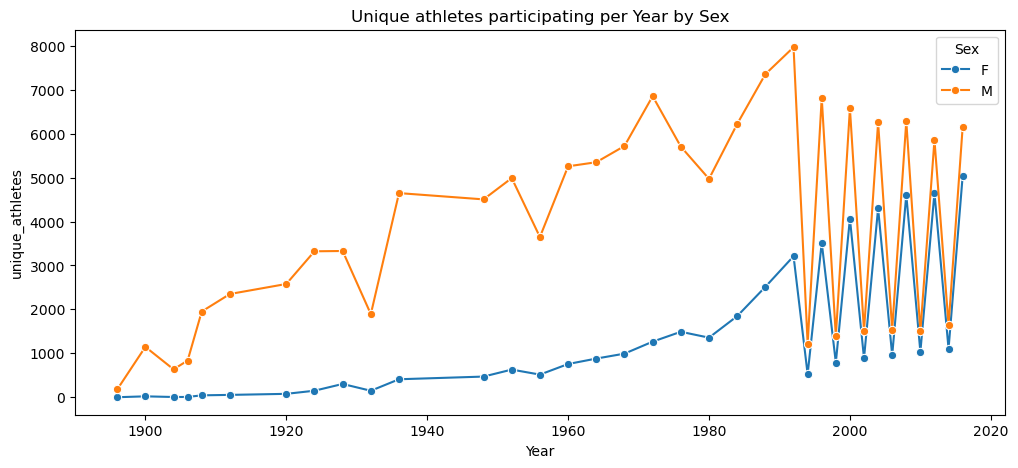

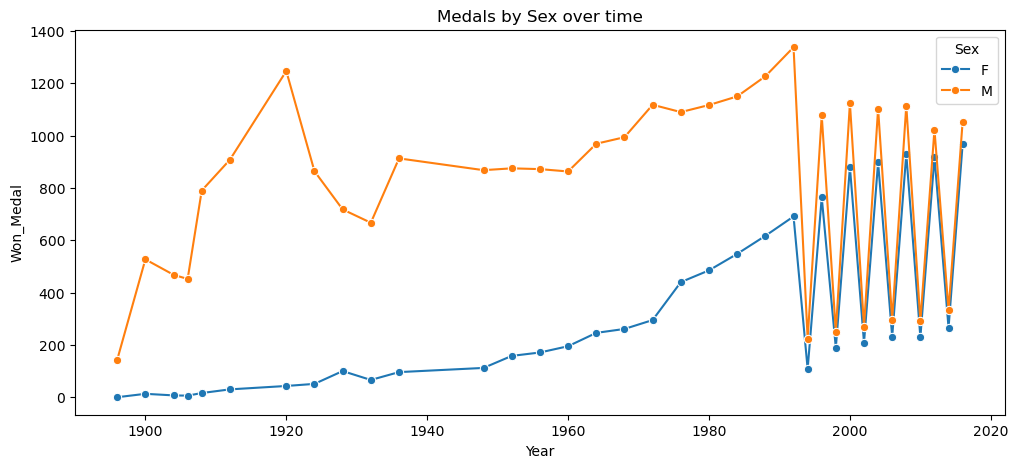

In [103]:
# 12a. Participation over time by sex
part = df.groupby(['Year','Sex'])['ID'].nunique().reset_index(name='unique_athletes')
plt.figure(figsize=(12,5))
sns.lineplot(data=part, x='Year', y='unique_athletes', hue='Sex', marker='o')
plt.title('Unique athletes participating per Year by Sex')
plt.show()

# 12b. Medal share by sex over time
medals_sex = medals.groupby(['Year','Sex'])['Won_Medal'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=medals_sex, x='Year', y='Won_Medal', hue='Sex', marker='o')
plt.title('Medals by Sex over time')
plt.show()


#### Pivot heatmap: Country vs Sport medal counts to see which countries dominate which sports.

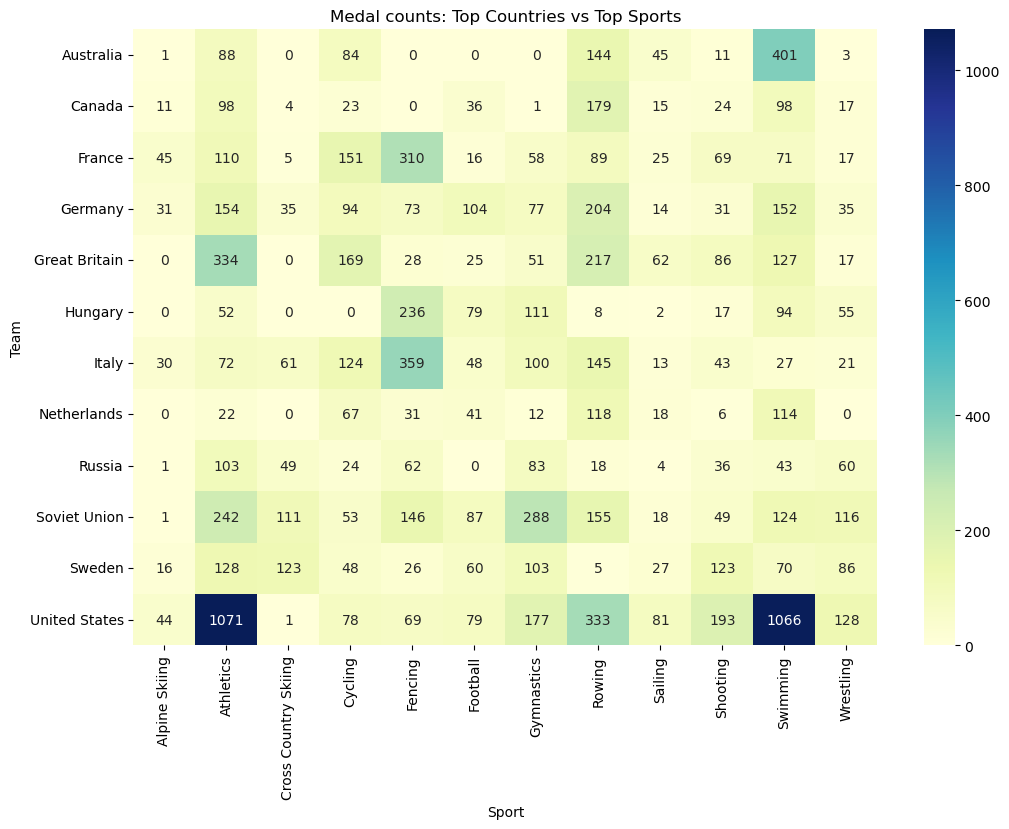

In [105]:
# 13. Pivot: country vs sport (top countries & top sports)
top_countries = medal_counts.head(12).index
top_sports = df['Sport'].value_counts().head(12).index
pivot = medals[medals['Team'].isin(top_countries) & medals['Sport'].isin(top_sports)]
pivot_table = pivot.pivot_table(index='Team', columns='Sport', values='Won_Medal', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Medal counts: Top Countries vs Top Sports')
plt.show()


#### medals by country over years

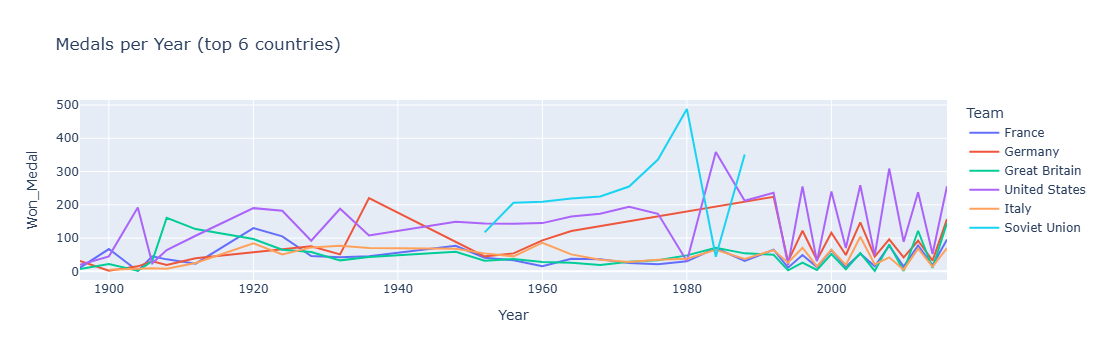

In [107]:
# 14. Example: animated line chart for one country set with Plotly
top6 = top_countries[:6]  # from earlier
df_anim = medals[medals['Team'].isin(top6)].groupby(['Year','Team'])['Won_Medal'].sum().reset_index()
fig = px.line(df_anim, x='Year', y='Won_Medal', color='Team', title='Medals per Year (top 6 countries)')
fig.show()
